In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Files to load
file_to_load = "Resources/bfro_reports_geocoded.csv"

# Read Purchasing File and store into Pandas data frame
bigfoot_data = pd.read_csv(file_to_load)

bigfoot_data.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed
0,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,1261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,heh i kinda feel a little dumb that im reporti...,"the road is off us rt 80, i dont know the exit...",Warren County,New Jersey,Fall,NaN,NaN,NaN,NaN,438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,...,0.10,0.001,0.7,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49
3,I was northeast of Macy Nebraska along the Mis...,Latitude & Longitude : 42.158230 -96.344197,Thurston County,Nebraska,Spring,Report 59757: Possible daylight sighting of a ...,42.15685,-96.34203,2018-05-25,59757.0,...,0.38,0.000,0.0,NaN,1008.07,Partly cloudy in the morning.,10.0,8.25,193.0,3.33
4,"While this incident occurred a long time ago, ...","Ward County, Just outside of a the Minuteman T...",Ward County,North Dakota,Spring,Report 751: Hunter describes described being s...,48.25422,-101.31660,2000-04-21,751.0,...,0.60,NaN,NaN,rain,1011.47,Partly cloudy until evening.,6.0,10.00,237.0,11.14


In [2]:
# Read over the data and get the statistics on latitudes and longitudes

# Latitude variables
lat_avg = bigfoot_data["latitude"].mean()
lat_med = bigfoot_data["latitude"].median()
lat_mode = bigfoot_data["latitude"].mode()
lat_mode = ["%.2f" % elem for elem in lat_mode]
lat_min = bigfoot_data["latitude"].min()
lat_max = bigfoot_data["latitude"].max()

# Longitude variables
lon_avg = bigfoot_data["longitude"].mean()
lon_med = bigfoot_data["longitude"].median()
lon_mode = bigfoot_data["longitude"].mode()
lon_mode = ["%.2f" % elem for elem in lon_mode]
lon_min = bigfoot_data["longitude"].min()
lon_max = bigfoot_data["longitude"].max()

# Create summary table
summary_lat_lon = pd.DataFrame({"Lat/Lon": ["Latitude", "Longitude"],
                               "Average": [lat_avg, lon_avg],
                               "Median": [lat_med, lon_med],
                               "Min": [lat_min, lon_min],
                               "Max": [lat_max, lon_max],
                               "Mode": [[lat_mode], [lon_mode]]})

# Rounding the values to 2 decimals
summary_lat_lon["Average"] = summary_lat_lon["Average"].astype(float).map("{:,.2f}".format)
summary_lat_lon["Median"] = summary_lat_lon["Median"].astype(float).map("{:,.2f}".format)
summary_lat_lon["Min"] = summary_lat_lon["Min"].astype(float).map("{:,.2f}".format)
summary_lat_lon["Max"] = summary_lat_lon["Max"].astype(float).map("{:,.2f}".format)

summary_lat_lon

,Lat/Lon,Average,Median,Min,Max,Mode
0,Latitude,39.31,39.25,25.14,64.89,[[38.93]]
1,Longitude,-97.45,-91.65,-167.13,-68.84,"[[-122.41, -120.09, -119.98, -119.98, -77.91]]"


In [3]:
# Bigfoots favorite temperatues (F)
# Average
Temp_High_Ave = bigfoot_data['temperature_high'].mean()
Temp_Mid_Ave = bigfoot_data['temperature_mid'].mean()
Temp_Low_Ave = bigfoot_data['temperature_low'].mean()

#Max
Temp_High_Max = bigfoot_data['temperature_high'].max()
Temp_Mid_Max = bigfoot_data['temperature_mid'].max()
Temp_Low_Max = bigfoot_data['temperature_low'].max()

#Min
Temp_High_Min = bigfoot_data['temperature_high'].min()
Temp_Mid_Min = bigfoot_data['temperature_mid'].min()
Temp_Low_Min = bigfoot_data['temperature_low'].min()

#Mode
Temp_High_Mode = bigfoot_data['temperature_high'].mode()
Temp_Mid_Mode = bigfoot_data['temperature_mid'].mode()
Temp_Low_Mode = bigfoot_data['temperature_low'].mode()
Temp_High_Mode = ["%.2f" % elem for elem in Temp_High_Mode]
Temp_Mid_Mode = ["%.2f" % elem for elem in Temp_Mid_Mode]
Temp_Low_Mode = ["%.2f" % elem for elem in Temp_Low_Mode]

#Median
Temp_High_Median = bigfoot_data['temperature_high'].median()
Temp_Mid_Median = bigfoot_data['temperature_mid'].median()
Temp_Low_Median = bigfoot_data['temperature_low'].median()

#summary table of the temps
summary_Temps = pd.DataFrame({
    "Average Temp(F)": [Temp_High_Ave,Temp_Mid_Ave,Temp_Low_Ave],
    "Max Temp": [Temp_High_Max,Temp_Mid_Max,Temp_Low_Max],
    "Min Temp": [Temp_High_Min,Temp_Mid_Min,Temp_Low_Min],
    "Mode Temp":[Temp_High_Mode,Temp_Mid_Mode,Temp_Low_Mode],
    "Median Temp":[Temp_High_Median,Temp_Mid_Median,Temp_Low_Median]
})

summary_Temps 

index = pd.Series(['High', 'Mid', 'Low'])
summary_Temps.set_index([index])

,Average Temp(F),Max Temp,Min Temp,Mode Temp,Median Temp
High,67.053050,106.51,-0.620,[82.37],69.98
Mid,57.805614,94.03,-8.455,[49.41],59.36
Low,48.638446,84.34,-22.780,"[34.11, 54.86]",49.49


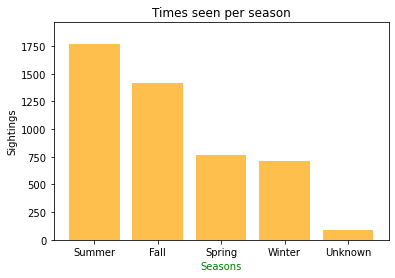

In [4]:
#Bigfoots most seen season

Seasons = bigfoot_data.value_counts('season')
#Seasons
Times_seen_season = [1765, 1413, 767, 711, 91]
x_axis = ['Summer', 'Fall', 'Spring', 'Winter', 'Unknown']

plt.bar(x_axis, Times_seen_season, color='orange', alpha=0.7, align="center")
plt.xlabel("Seasons", color='green')
plt.ylabel("Sightings")
plt.title("Times seen per season")
plt.ylim(0, max(Times_seen_season)+200)


plt.show()


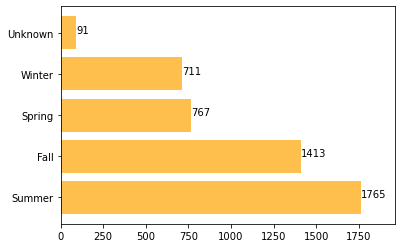

In [5]:
#Bigfoot most seen seasons but sideways and with the number displayed

plt.barh(x_axis, Times_seen_season, color='orange', alpha = 0.7)
plt.xlim(0, max(Times_seen_season)+200)
for index, value in enumerate(Times_seen_season):
    plt.text(value, index,
             str(value))


In [6]:
# type of weather 
bigfoot_data['summary'].unique()

array([nan, 'Mostly cloudy throughout the day.',
       'Partly cloudy in the morning.', 'Partly cloudy until evening.',
       'Partly cloudy until evening and breezy throughout the day.',
       'Partly cloudy starting in the afternoon, continuing until evening.',
       'Foggy overnight.',
       'Breezy starting in the afternoon, continuing until evening, and mostly cloudy overnight.',
       'Humid and mostly cloudy throughout the day.',
       'Rain in the morning.', 'Mostly cloudy until afternoon.',
       'Clear throughout the day.', 'Overcast overnight.',
       'Foggy in the morning.',
       'Mostly cloudy starting in the afternoon.',
       'Light rain starting in the afternoon.',
       'Mostly cloudy in the morning and windy until evening.',
       'Light snow and breezy in the morning.',
       'Heavy rain starting in the afternoon, continuing until evening.',
       'Breezy and overcast throughout the day.',
       'Light precipitation overnight.', 'Partly cloudy until 

In [7]:
#displaying the number of time that key words used to describe the weather 
weather_foot = bigfoot_data['summary'].str.split(expand=True).stack().value_counts()
weather_foot['precipitation']

40

In [8]:
#Grouping the types of weather together with the key words 
rain = weather_foot['Rain'] + weather_foot['rain']+ weather_foot['precipitation']
cloudy = weather_foot['cloudy'] + weather_foot['Overcast'] + weather_foot['overcast']
clear = weather_foot['Clear']  
snow = weather_foot['snow'] + weather_foot['Snow']
mixed_precip = weather_foot['Mixed'] + weather_foot['mixed']


In [9]:
#creating a dataframe with the values that were summed together
weather_Data = pd.DataFrame({
    "Rain": [rain],
    "Cloudy": [cloudy],
    "Clear": [clear],
    "Snow": [snow],
    "Mixed": [mixed_precip]
})

#displaying the DataFrame
weather_Data

,Rain,Cloudy,Clear,Snow,Mixed
0,501,1583,686,40,18


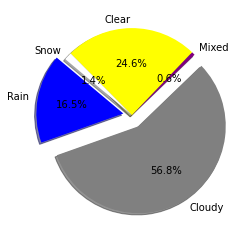

In [10]:
#Plotting a pie chart to visualize the above findings

#weather_pie = weather_Data.plot(kind="pie", y='', title=("Weather Most Seen In")) FAILED IT

labels = ['Rain', 'Cloudy', 'Mixed','Clear', 'Snow']
size = [461, 1583, 18, 686, 40]
colors = ['blue', 'grey','purple', 'yellow', 'white']
explode = (0.1, 0.15, 0, 0, 0)


plt.pie(size,explode=explode ,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

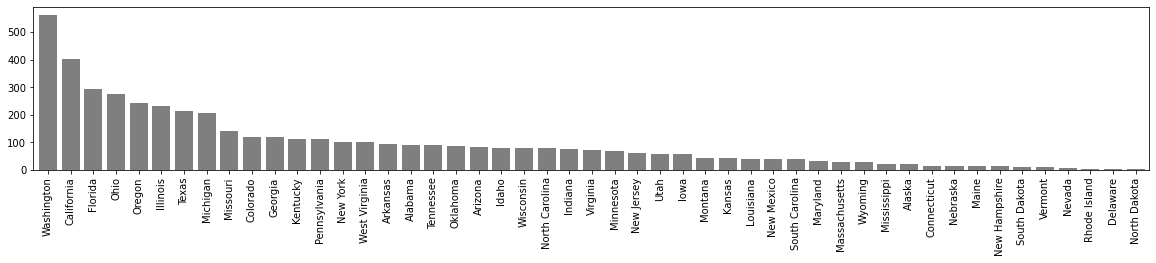

In [11]:
#State count of Bigfoot sightings shown in a bar chart

statedf = pd.DataFrame(bigfoot_data['state'].value_counts())
state_df = statedf.reset_index()

state_df.head()

#x axis and tick locations
x_axis = np.arange(len(state_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, state_df['state'], color='k', alpha=0.5, align="edge")
plt.xticks(tick_locations, state_df['index'], rotation=90)

plt.xlim(-0.25, len(x_axis))

plt.show()

In [12]:
#highest and lowest counts of Bigfoot 

state_df_twenty = state_df.head(20)
state_df_tail = state_df.tail()
state_df_tail

,index,state
44,Vermont,9
45,Nevada,7
46,Rhode Island,5
47,Delaware,5
48,North Dakota,4


In [13]:
#converting the date columns into years was formated : (****-**-**)

bigfoot_date = bigfoot_data.dropna()
#bigfoot_date['date'].value_counts()
bigfoot_datedf = pd.DataFrame(bigfoot_data['date'].value_counts())

bigfoot_date_df = bigfoot_datedf.reset_index()
#now displayed the year only
bigfoot_date_df['year'] = bigfoot_date_df['index'].astype(str).str[:4]

#dropped the orginal date column
bigfoot_date_df = bigfoot_date_df.drop(columns=bigfoot_date_df.columns[0])

#sorted the years and the total amount of sightings per year
bigfoot_date_df.groupby('year')
bigfoot_year = pd.DataFrame(bigfoot_date_df['year'].value_counts())
bigfoot_year = bigfoot_year.reset_index()
bigfoot_year
bigfoot_year_clean = bigfoot_year.rename(columns={'index': 'Year', 'year': 'Sightings'})
bigfoot_year_clean

,Year,Sightings
0,2004,161
1,2005,139
2,2006,126
3,2007,116
4,2012,111
...,...,...
75,1954,1
76,1921,1
77,1930,1
78,1948,1


(0.0, 181.0)

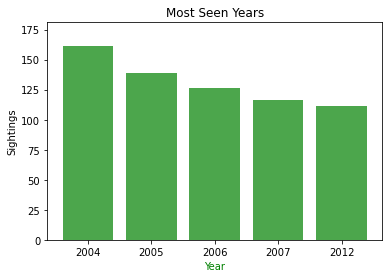

In [14]:
#Bar chart showing the top five years
Times_seen_year = [161, 139, 126, 116, 111]
x_axis = ['2004', '2005', '2006', '2007', '2012']

plt.bar(x_axis, Times_seen_year, color='green', alpha=0.7, align="center")
plt.xlabel("Year", color='green')
plt.ylabel("Sightings")
plt.title("Most Seen Years")
plt.ylim(0, max(Times_seen_year)+20)

(0.0, 181.0)

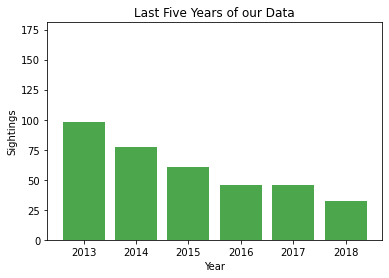

In [15]:
#showing the last five years of our data 

last_five_years = [98, 77, 61, 46, 46, 32]
x_axis = ['2013', '2014', '2015', '2016', '2017', '2018']

plt.bar(x_axis, last_five_years, color='green', alpha=0.7, align="center")
plt.xlabel("Year")
plt.ylabel("Sightings")
plt.title("Last Five Years of our Data")
plt.ylim(0, max(Times_seen_year)+20)

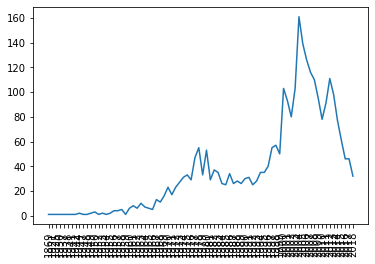

In [16]:
#line graph of the year vs. the number of sightings 
bigfoot_line = bigfoot_year_clean.sort_values('Year')

plt.plot(bigfoot_line['Year'], bigfoot_line['Sightings'])
plt.xticks(rotation = 90)

plt.show()
#too cluttered at the bottom but need all the data points plotted

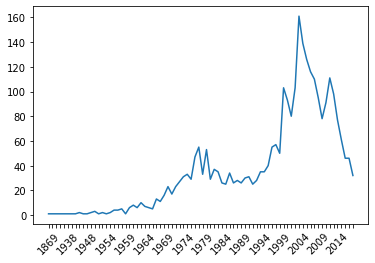

In [17]:
#GOOGLE 

fig, ax = plt.subplots()
ax.plot(bigfoot_line['Year'], bigfoot_line['Sightings'])
plt.xticks(rotation=45)

every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)

        
plt.show()

In [18]:
# Find most common year for sightings

# Create new data frame for years, dropping null values
years_df = pd.DataFrame(bigfoot_data["date"])
years_df = years_df.dropna()
# Converts date to year only and creates new column
years_df["year"] = pd.DatetimeIndex(years_df["date"]).year
# Summary statistics
year_min = years_df["year"].min()
year_max = years_df["year"].max()
year_mode = years_df["year"].mode()[0]
years_summary = pd.DataFrame({"Earliest Year": [year_min],
                             "Most Recent Year": [year_max],
                             "Most Seen Year": [year_mode]})
years_summary

,Earliest Year,Most Recent Year,Most Seen Year
0,1869,2018,2004


In [20]:
# Import API for gmaps just in this cell
from api_keys import g_key
import gmaps
gmaps.configure(api_key=g_key)

# Make data frame of just latitudes and longitudes
bigfoot_data_no_na = pd.DataFrame({"Latitude": bigfoot_data["latitude"].dropna(),
                                   "Longitude": bigfoot_data["longitude"].dropna()})
locations = bigfoot_data_no_na[["Latitude", "Longitude"]].astype(float)

# Create map
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

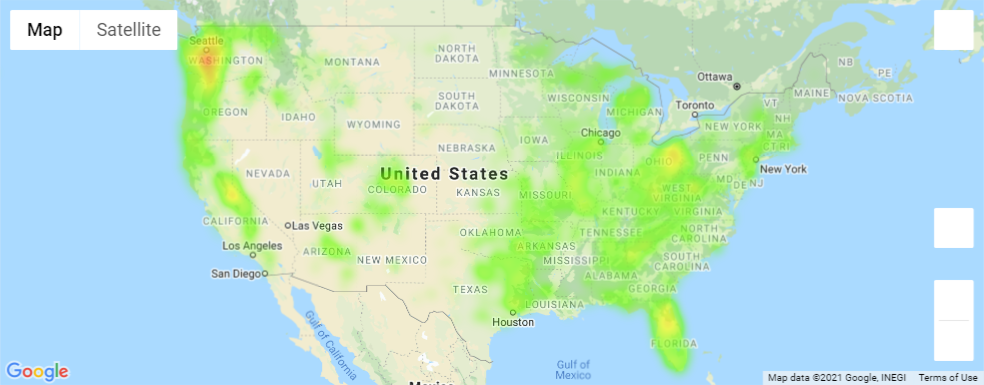

In [1]:
from IPython.display import Image
Image(filename='Images/heatmap.png') 